<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1: Matrix Factorization**
**Teo Nordström**

# **Abstract**

This file contains the solutions to the three mandatory problems from Lab1 in DD2363, in addition to the solution to one of the optional problems. It is based upon pseudocode and info found in *Methods in Computational Science* by Johan Hoffman (2021)

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license.

In [10]:
"""This file is based on a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# TEMPLATE INFO:
# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# CODE INFO:
# Code written by Teo Nordström 2024, no license.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

These are the neccessary modules for everything in this file to work.

In [11]:
from google.colab import files

import numpy as np
from math import exp
from matplotlib import pyplot as plt



# **Introduction**

All solutions will be partially or entirely based upon the book *Methods in Computational Science* by Johan Hoffman (2021). In the text, it will be referred to as the "course book".

# Time Stepping for Scalar Initial Value Problem
Time Stepping for Scalar Initial Value Problem on the form $\frac{du}{dt}=f(u, t)$ is a way of solving a differential equation. To do this, Euler's Method will be used, specifically in this case Explicit Euler Method (also called Forward Euler). The Explicit Euler Method steps through and interpolates approximations $U$ for $u$ for each timestep $k$ between $[0, T]$ where $T$ is the end time and $t$ is the current time. It uses the previous approximation $U(t-k)$ to generate the aproximation  $U(t)$.

# Time Stepping for System of Initial Value Problems

Time stepping for Systems of IVPs is essentially the same thing as the one for scalars, but for several scalars in a system. The definition is equal to the one for scalars, but instead $u$ is a vector and $f(u, t)$ results in a vector.



# **Method**

# Time Stepping for Scalar Initial Value Problem
To perform the time stepping scalar IVM we followed the pseudocode laid forth in Algorithm 13.1 in the course book. It stated a way of performing the Explicit Euler Method on a function $f=(u, t)$, combined with an initial data $u_0$, the start time $t_0$, the end time $T$, and the length of each time step $k$. Because our implementation is only supposed to check in the time span $[0, T]$ we have chosen to remove the $t_0$ parameter, always starting with $t_0 = 0$.

In [12]:
def explicit_euler_method(T, f, u0, k):
    t = [0]
    u = [u0]
    while t[-1] < T:
        u.append(u[-1] + k*f(u[-1], t[-1]))
        t.append(t[-1] + k)
    return u, t


def ee_f(u, t):
    return -2 * u


print(explicit_euler_method(10, ee_f, 1, 1)[0][-1])

1


# Time Stepping for System of Initial Value Problems

When it comes to systems, the implementation is actually the exact same. Since we through numpy have overrides for many of the functions, we can actually just use the same solver function as for scalar problems but using numpy arrays for the function and in-data.

In [13]:
# Same base function is used as for Scalar. These are only tests

def eesys_f(u, t):
    return np.array([u[1], -u[0]])


print(explicit_euler_method(10, eesys_f, np.array([0, 1]), 1)[0][-1])

[32  0]


# **Results**

In this section tests will be performed to verify that the solutions are correct

# Time Stepping for Scalar Initial Value Problem
To test the Time Stepping for Scalar IVM we use the information laid forth in chapter 13.4 "Stability of time stepping methods". This states a convention to test time stepping models, which is a linear model problem $\dot{u}(t)=\lambda u(t), \; 0<t ≤ T, \; u(0)=1$ with solution $u(t) = exp(\lambda t)$, where $Re(\lambda ) < 0$. With this in mind, we begin by creating the problem by setting $\lambda$ to a value between $-5$ and $-1$ which will give us a known solveable problem. We then calculate the limit for the timestep $k$ for convergence, which is according to the chapter $|1+k\lambda| < 1$ for this problem. We take the value for $k$ that is the first value where the problem will not converge and generate one $k$ above that and one under it. We then process using these values of $k$, giving one solution that converges and one that doesn't. These are then plotted to show whether they converge or not, and we can easily see that the ones with $k$ that makes $|1+k\lambda| ≥ 1$ don't converge while the other does.


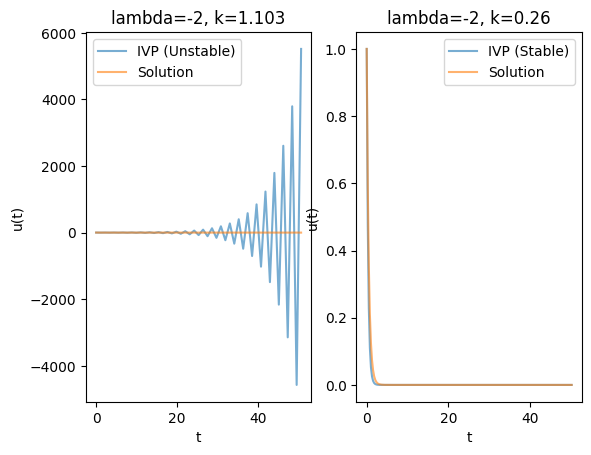

In [14]:
def ee_test(iters):
    for test in range(iters):
        lambda_val = np.random.randint(-5, -1)

        def f(u, t):
            return lambda_val * u

        def ut(t):
            return [exp(lambda_val * ti) for ti in t]

        max_for_stable = 2 / -lambda_val
        stable_k = np.random.uniform(0.1, max_for_stable)
        unstable_k = np.random.uniform(max_for_stable, 3)

        stable_u, stable_t = explicit_euler_method(50, f, 1, stable_k)
        unstable_u, unstable_t = explicit_euler_method(50, f, 1, unstable_k)

        figure, axis = plt.subplots(1, 2)
        axis[0].set_title(f"lambda={round(lambda_val, 3)}, k={round(unstable_k, 3)}")
        axis[0].plot(unstable_t, unstable_u, label="IVP (Unstable)", alpha=0.6)
        axis[0].plot(unstable_t, ut(unstable_t), label="Solution", alpha=0.6)
        axis[0].set(xlabel='t', ylabel='u(t)')
        axis[0].legend()

        axis[1].set_title(f"lambda={round(lambda_val, 3)}, k={round(stable_k, 3)}")
        axis[1].plot(stable_t, stable_u, label="IVP (Stable)", alpha=0.6)
        axis[1].plot(stable_t, ut(stable_t), label="Solution", alpha=0.6)
        axis[1].set(xlabel='t', ylabel='u(t)')
        axis[1].legend()

        plt.show()


ee_test(1)


# Time Stepping for System of Initial Value Problems

Like the implemention of the method, the tests are also quite similar and based upon the same principle but this time in several dimensions. Instead of directly choosing the $\lambda$ we create a matrix $A$ with eigenvalues $λ_0$ and $λ_1$. We set our initial values of $u(0) = (1, 1)^T$. To this, $\dot{u}(t)= Au$, with solution to system being $u(t)=e^{At}$. We then have the same criterion, that $|1+k\lambda| < 1$ for it to converge, but because it is a system this has to be true for all $λ_i$. To get a converging value for $k$ we therefore make sure that the $\frac{k}{\lambda}$ term is within the span $(0, 2)$ by choosing $k ∈ [0.1, \left(\frac{\lambda_m}{2}\right)^{-1})$ where $\lambda_m$ is the $\lambda_i$ with highest absolute value (which will be $min(λ_i)$ since all $\lambda$ will be negative). We also pick a value for $k$ which we know will be unstable, a.k.a any value above $\left(\frac{\lambda_m}{2}\right)^{-1}$. It can be seen on the graphs that the function converges when expected, and does not converge when $k$ is too large.

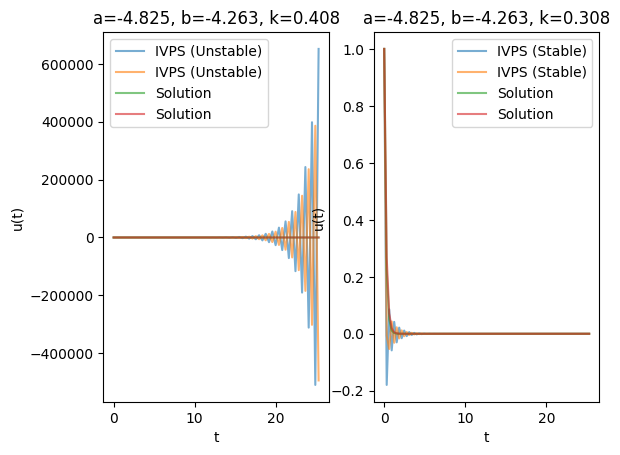

In [19]:
def eesys_test(iters):
    for test in range(iters):

        a = np.random.uniform(-5, -1)
        b = np.random.uniform(-5, -1)
        A = np.array([[a, 1], [1, b]])
        evs, _ = np.linalg.eig(A)

        def f(u, t):
            return A @ u

        def ut(t):
            diagarr = np.array([np.exp(A * ti) for ti in t])
            arr = []
            for matrix in diagarr:
                arr.append(np.diagonal(matrix))
            return arr

        max_for_stable = -1 / (min(evs) / 2)

        stable_k = np.random.uniform(0.1, max_for_stable)
        unstable_k = np.random.uniform(max_for_stable, max_for_stable * 1.5)
        stable_u, stable_t = explicit_euler_method(25, f, np.array([1, 1]), stable_k)
        unstable_u, unstable_t = explicit_euler_method(25, f, np.array([1, 1]), unstable_k)

        figure, axis = plt.subplots(1, 2)
        axis[0].set_title(f"a={round(a, 3)}, b={round(b, 3)}, k={round(unstable_k, 3)}")
        axis[0].plot(unstable_t, unstable_u, label="IVPS (Unstable)", alpha=0.6)
        axis[0].plot(unstable_t, ut(unstable_t), label="Solution", alpha=0.6)
        axis[0].set(xlabel='t', ylabel='u(t)')
        axis[0].legend()

        axis[1].set_title(f"a={round(a, 3)}, b={round(b, 3)}, k={round(stable_k, 3)}")
        axis[1].plot(stable_t, stable_u, label="IVPS (Stable)", alpha=0.6)
        axis[1].plot(stable_t, ut(stable_t), label="Solution", alpha=0.6)
        axis[1].set(xlabel='t', ylabel='u(t)')
        axis[1].legend()

        plt.show()


eesys_test(1)

# **Discussion**

The implementations this week were very interesting considering they did not have to be rewritten to function well. I do however thing it *may* be possible to improve them through using numpy functions from the start, though I was also a bit too lazy to change something that was already working, sorry Ashish. All in all, interesting exercises where the hardest part was actually implementing the tests!